# Erd&ouml;s-R&eacute;nyi (ER) Random Networks

We will start our description with the simplest random network model. Consider a social network, with 50 students. Our network will have 50 nodes, where each node represents a single student in the network. Edges in the social network represent whether or not a pair of students are friends. What is the simplest way we could describe whether two people are friends?

In this case, the simplest possible thing to do would be to say, for any two students in our network, there is some probability (which we will call $p$) that describes how likely they are to be friends. In the below example, for the sake of argument, we will let $p=0.3$. What does a realization from this network look like? 

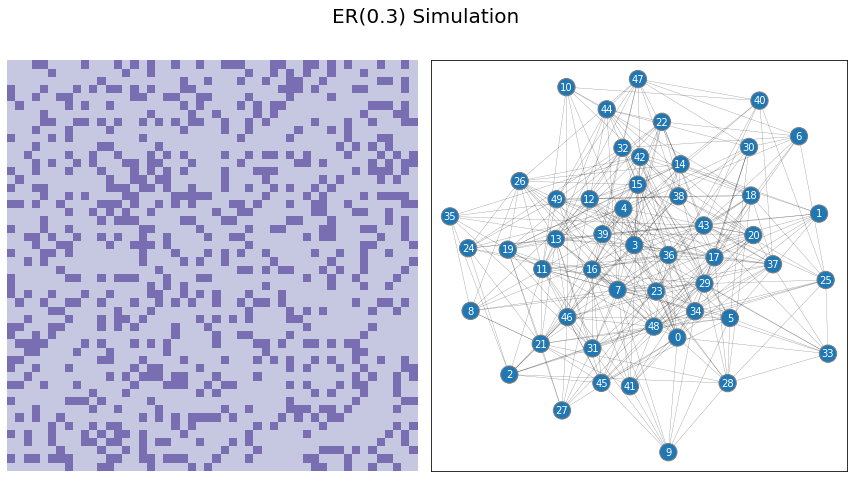

In [1]:
from graphbook_code import draw_multiplot
from graspologic.simulations import er_np

n = 50  # network with 50 nodes
p = 0.3  # probability of an edge existing is .3

# sample a single simple adjacency matrix from ER(50, .3)
A = er_np(n=n, p=p, directed=False, loops=False)

draw_multiplot(A, title="ER(0.3) Simulation");

As we mentioned in the preface for this chapter, every statisical model in this book will come down to the coin flip model. In network machine learning, we get to see an adjacency matrix $A$ whose entries $a_{ij}$ are one if the students $i$ and $j$ are friends on the social networking site, and $0$ if the students $i$ and $j$ are not friends on the social networking site. Just like we had a random coin $\mathbf x$ which behaved like a $Bern(p)$ coin from the collection $\left\{Bern(q) : q \text{ is a probability between $0$ and $1$}\right\}$, we will assume that the network $A$ is a realization of a random network $\mathbf A$ which behaves like an element of a collection of random neworks. This might seem like a big stretch, so let's try to put it into perspective.

Since $A$ was an $n \times n$ matrix, $\mathbf A$ is an $n \times n$ random matrix. The elements of $\mathbf A$ will be given by the symbols $\mathbf a_{ij}$, which means that each edge $a_{ij}$ of $A$ is a realization of the random edge $\mathbf a_{ij}$. Just how do we describe this $\mathbf a_{ij}$? Remember that our realizations $a_{ij}$ are just $0$s and $1$s, which *feels* a lot like flipping a coin, doesn't it? Did the coin land on heads, or did it land on tails? Are the two people $i$ and $j$ friends, or are they not friends? If we had a coin with some probability of landing on heads, we could describe $a_{ij}$ as a realization of this coin flip. We could assume that a value of one is analogous to the coin landing on heads, and value of zero is analogous to the coin landing on tails. Perhaps we could even model the network using the same approach we took before with the coin flip. This is starting to go somewhere, so let's continue with the analogies.

## The Erd&ouml;s R&eacute;nyi random network is parametrized by the independent-edge probability

This simple random network model is called the Erd&ouml;s R&eacute;nyi (ER) model<sup>1</sup>. The way we can think of an ER random network is that the edges depend *only* on a probability, $p$, and each edge is totally independent of all other edges. We can think of this example as though a coin flip is performed, where the coin has a probability $p$ of landing on heads, and $1-p$ of landing on tails. For each edge in the network, we conceptually flip the coin, and if it lands on heads (with probability $p$), the edge exists, and if it lands on tails (with probability $1-p$) the edge does not exist. The meaning of *independence* is a little technical and goes a bit outside of the scope of this book, so we will leave it at a very high level as meaning that the outcome of particular coin flips do not impact the outcomes of other coin flips. This is not a very precise definition, but it will be plenty for our purposes. If $\mathbf A$ is a random network which is $ER_n(p)$ with $n$ nodes and probability $p$, we will often say that $\mathbf A$ is an $ER_n(p)$ random network.

## How do we simulate realizations of $ER_n(p)$ random networks?

This approach which we will use to describe random networks is called a *generative model*, which means that we have described an observable network realization $A$ of the random network $\mathbf A$ in terms of the parameters of $\mathbf A$. In the case of the $ER_n(p)$ random networks, we have described $\mathbf A$ in terms of the probability parameter, $p$. Generative models are convenient in that we can easily adapt them to tell us exactly how to simulate realizations of the underlying random network. The procedure below will produce for us a network $A$, which has nodes and edges, where the underlying random network  $\mathbf A$ is an $ER_n(p)$ random network:

```{admonition} Simulating a realization from an $ER_n(p)$ random network
1. Determine a probability, $p$, of an edge existing.
2. Obtain a weighted coin which has a probability $p$ of landing on heads, and a probability $1 - p$ of landing on tails. Note that this probability $p$ might differ from the "traditional" coin with a probability of landing on heads of approximately $0.5$.
3. Flip the once for each *possible* edge $(i, j)$ between nodes $i$ and $j$ in the network. For a simple network, we will repeat the coin flip $\binom n 2$ times. 
4. For each coin flip which landed on heads, define that the corresponding edge exists, and define that the corresponding entry $a_{ij}$ in the adjacency matrix is $1$. For each coin flip which lands on tails, define that the corresponding edge does not exist, and define that $a_{ij} = 0$.
5. The adjacency matrix we produce, $A$, is a realization of an $ER_n(p)$ random network.
```

## When do we use an $ER_n(p)$ Network?

In practice, the $ER_n(p)$ model seems like it might be a little too simple to be useful. Why would it ever be useful to think that the best we can do to describe our network is to say that connections exist with some probability? Does this miss a *lot* of useful questions we might want to answer? Fortunately, there are a number of ways in which the simplicity of the $ER_n(p)$ model is useful. Given a probability and a number of nodes, we can easily describe the properties we would expect to see in a network if that network were ER. For instance, we know how many edges on average the nodes of an $ER_n(p)$ random nework should have. We can reverse this idea, too: given a network we think might *not* be ER, we could check whether it's different in some way from an $ER_n(p)$ random network. For instance, if we see that half the nodes have a ton of edges (meaning, they have a high degree), and half don't, we might be able to determine that the network is poorly described by an $ER_n(p)$ random network. If this is the case, we might look for other models that could describe our network which are more complex. 

<!-- Another utility of the $ER_n(p)$ model is that we might often want to benchmark network algorithms on simulated networks with a given *sparsity*. **Network sparsity** is a feature of a network which describes the degree to which the network possesses fewer edges than the maximum number of possible edges. As an example, when we know ahead of time that the network is going to be sparse (the network has a *small* number of edges which exist relative the number of possible edges), we can use network machine learning techniques which anticipate this sparsity to make the algorithm faster. In a simple network, for instance, the maximum number of possible edges is $\binom n 2$. In an $ER_n(p)$ network with probability $p$, we would expect the network to have on average about $p \binom n 2$ edges; that is, $p$ describes the fraction of total possible edges that we would expect to exist. $ER_n(p)$ networks are extremely cheap to simulate computationally, because "flipping weighted coins" (if you are curious, this is called a *Bernoulli sample* with probability $p$) is usually able to be performed with extremely optimized code in most standard programming languages such as python. Being able to generate networks very easily with a given number of nodes $n$ and a given sparsity allows us to test just how efficient our network machine learning technique is.
-->

In the next code block, we are going to sample a single $ER_n(p)$ network with $50$ nodes and an edge probability $p$ of $0.3$:

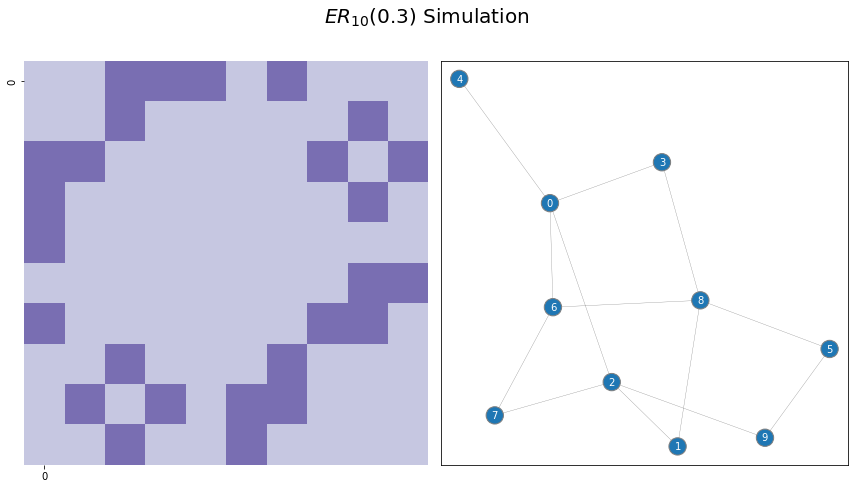

In [2]:
from graphbook_code import draw_multiplot
from graspologic.simulations import er_np

n = 10  # network with 50 nodes
p = 0.3  # probability of an edge existing is .3

# sample a single simple adjacency matrix from ER(50, .3)
A = er_np(n=n, p=p, directed=False, loops=False)

# and plot it
draw_multiplot(A, title="$ER_{10}(0.3)$ Simulation", xticklabels=10, yticklabels=10);

Above, we visualize the network using a heatmap. The dark squares indicate that an edge exists between a pair of nodes, and white squares indicate that an edge does not exist between a pair of nodes.

Next, let's see what happens when we use a higher edge probability, like $p=0.7$:

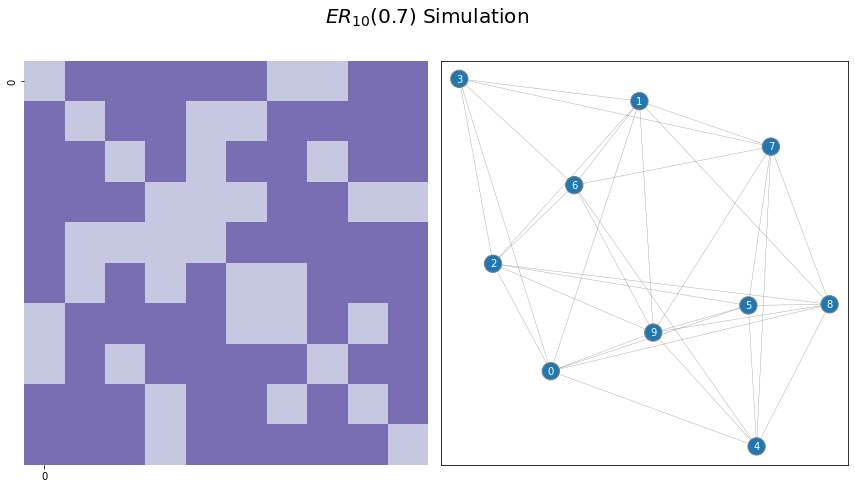

In [3]:
p = 0.7  # network has an edge probability of 0.7

# sample a single adjacency matrix from ER(50, 0.7)
A = er_np(n=n, p=p, directed=False, loops=False)

# and plot it
draw_multiplot(A, title="$ER_{10}(0.7)$ Simulation", xticklabels=10, yticklabels=10);

As the edge probability increases, the sampled adjacency matrix tends to indicate that there are more connections in the network. This is because there is a higher chance of an edge existing when $p$ is larger.

## Just how many networks are possible for a network with $n$ nodes?

As you're going to become accustomed to, we're going to boil this down again to coin flips. If we had one coin, there are two possible outcomes: either heads or tails. If we had two coins, the first coin could be heads or tails, and the second coin could be heads or tails. Let's break this down by fixing the outcome of the first coin. If the first coin were heads, there are two possible outcomes for the second coin. If the first coin were tails, there are two possible outcomes for the second coin. This means that the total number of possible outcomes is the sum of the number of possible outcomes if the first coin is heads with the number of possible outcomes if the first coin were tails. This gives us that with two coins, we have four possible outcomes. When we add a third coin, we repeat this process again. If the first coin were heads, the second two coins could take any of four possible outcomes as we just learned. if the first coin were tails, the second two coins could also taake any of four possible outcomes. Therefore, with three coins, we have eight possible outcomes. As we continue this procedure, we quickly will realize that with $x$ coin flips, we have $2^x$ possible outcomes. 

Remember in Chapter 4 when discussing the [properties of networks](#link?), we determined that there are $\frac{1}{2}n(n - 1)$ possible edges in a simple network, which we could represent using the notation $\binom n 2$. In a realized network, each of these edges could exist or not exist, so there are again two possibilities just like the coin flips. Since edges existing or not existing boils down to a coin flip, the number of possible networks with $n$ nodes is just $2$ to the power of the number of coin flips that are performed in the network. Here, this is $2^{\binom n 2}$. This quantity gets *really* big *really* fast! Let's see just how fast below:

In [4]:
import numpy as np
from math import comb

ns = np.arange(2, 51)
nposs = np.array([comb(n, 2) for n in ns])*np.log10(2)

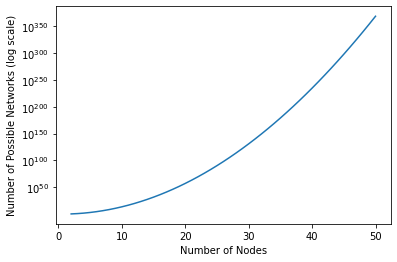

In [5]:
import seaborn as sns

ax = sns.lineplot(x=ns, y=nposs)
ax.set_title("")
ax.set_xlabel("Number of Nodes")
ax.set_ylabel("Number of Possible Networks (log scale)")
ax.set_yticks([50, 100, 150, 200, 250, 300, 350])
ax.set_yticklabels(["$10^{{{pow:d}}}$".format(pow=d) for d in [50, 100, 150, 200, 250, 300, 350]])
ax;

This is an enormous quantity! When $n$ is just $6$, the number of possible networks is $2^{\binom 6 2} = 2^{6}$ which is over $32,000$. When $n$ is $15$, the number of posssible networks balloons up to $2^{\binom{15}{2}} = 2^{105}$ which is over $10^{30}$. As the number of nodes increases, the number of possible network balloons really, really fast!

## References

[1] Erd&ouml;s P, R&eacute;nyi A. 1959. "On random graphs, I." Publ. Math. Debrecen 6:290–297.
